### Book Link

https://drive.google.com/file/d/18BmnoAIu7tT-Rt_6jI0mPjwC8StyVvep/view?usp=share_link

### Importing necessary libraries

In [81]:
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random as rnd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict,Counter
from nltk.util import ngrams


### Downloading packages

In [82]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Function for data preprocessing using regular expressions

In [83]:
def text_preprocessing(raw):
    # lower case
    raw = raw.lower()
    # remove numbers
    raw = re.sub(r'\d+', '', raw)
    # remove punctuation
    raw = re.sub(r'[^\w\s]', '', raw)
    # white space removal
    raw = raw.strip()
    #removing any non alphanumeric characters
    raw = re.sub('\W', ' ', raw)  
    #removing extra white spaces
    raw = re.sub('\s+', ' ', raw) 
    #removing chapter numbers and running sections
    raw = re.sub('chapter \w*', '', raw)   
    return (raw)

## Importing the text  

In [84]:
novel= open("novel.txt")
raw_text=novel.read()
T=raw_text

In [85]:
T

' OPERATION INTERSTELLAR ***\n\n\n\n\nProduced by Greg Weeks, Mary Meehan and the Online\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\n                        OPERATION INTERSTELLAR\n\n                                 _By_\n                            George O. Smith\n\n                         CENTURY PUBLICATIONS\n                                Chicago\n\n                  Published by Century Publications,\n                   139 N. Clark St., Chicago 2, Ill.\n               _Printed in the United States of America_\n\n     Characters and situations in this book are fictional and any\n    similarity to actual persons or places is purely coincidental.\n\n        Permission to use some of the refrains from the ballad:\n\n                     THE CYCLOTRONIST\'S NIGHTMARE\n\n                           by Arthur Roberts\n                                  of\n                     The State University of Iowa\n          was graciously granted, and is hereby ack

### Applying the preprocessing function

In [86]:
T=text_preprocessing(T)
print(T)

operation interstellar produced by greg weeks mary meehan and the online distributed proofreading team at httpwwwpgdpnet operation interstellar _by_ george o smith century publications chicago published by century publications n clark st chicago ill _printed in the united states of america_ characters and situations in this book are fictional and any similarity to actual persons or places is purely coincidental permission to use some of the refrains from the ballad the cyclotronists nightmare by arthur roberts of the state university of iowa was graciously granted and is hereby acknowledged with sincere appreciation cover by malcolm smith _copyright century publications_ transcribers note extensive research did not uncover any evidence that the us copyright on this publication was renewed  grayson walked the city street slowly he was sauntering towards the spaceport but he was in no hurry he had allowed himself plenty of time to breathe the fresh spring air to listen to the myriad of s

In [87]:
def stopwords_text(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))

    x = 65
    y = 97
    # Adding all the uppercase and lowecase letters to stopwords
    
    for i in range(26):
        stop_words.add(chr(x))
        stop_words.add(chr(y))
        x += 1
        y += 1
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop_words]
    return result

## Tokenizing the text 

In [88]:
tokenized_T=word_tokenize(T)
tokenized_T

['operation',
 'interstellar',
 'produced',
 'by',
 'greg',
 'weeks',
 'mary',
 'meehan',
 'and',
 'the',
 'online',
 'distributed',
 'proofreading',
 'team',
 'at',
 'httpwwwpgdpnet',
 'operation',
 'interstellar',
 '_by_',
 'george',
 'o',
 'smith',
 'century',
 'publications',
 'chicago',
 'published',
 'by',
 'century',
 'publications',
 'n',
 'clark',
 'st',
 'chicago',
 'ill',
 '_printed',
 'in',
 'the',
 'united',
 'states',
 'of',
 'america_',
 'characters',
 'and',
 'situations',
 'in',
 'this',
 'book',
 'are',
 'fictional',
 'and',
 'any',
 'similarity',
 'to',
 'actual',
 'persons',
 'or',
 'places',
 'is',
 'purely',
 'coincidental',
 'permission',
 'to',
 'use',
 'some',
 'of',
 'the',
 'refrains',
 'from',
 'the',
 'ballad',
 'the',
 'cyclotronists',
 'nightmare',
 'by',
 'arthur',
 'roberts',
 'of',
 'the',
 'state',
 'university',
 'of',
 'iowa',
 'was',
 'graciously',
 'granted',
 'and',
 'is',
 'hereby',
 'acknowledged',
 'with',
 'sincere',
 'appreciation',
 'cover'

## Text tokenized and stopwords removed

In [89]:
cleaned_text=stopwords_text(T)
cleaned_text

['operation',
 'interstellar',
 'produced',
 'greg',
 'weeks',
 'mary',
 'meehan',
 'online',
 'distributed',
 'proofreading',
 'team',
 'httpwwwpgdpnet',
 'operation',
 'interstellar',
 '_by_',
 'george',
 'smith',
 'century',
 'publications',
 'chicago',
 'published',
 'century',
 'publications',
 'clark',
 'st',
 'chicago',
 'ill',
 '_printed',
 'united',
 'states',
 'america_',
 'characters',
 'situations',
 'book',
 'fictional',
 'similarity',
 'actual',
 'persons',
 'places',
 'purely',
 'coincidental',
 'permission',
 'use',
 'refrains',
 'ballad',
 'cyclotronists',
 'nightmare',
 'arthur',
 'roberts',
 'state',
 'university',
 'iowa',
 'graciously',
 'granted',
 'hereby',
 'acknowledged',
 'sincere',
 'appreciation',
 'cover',
 'malcolm',
 'smith',
 '_copyright',
 'century',
 'publications_',
 'transcribers',
 'note',
 'extensive',
 'research',
 'uncover',
 'evidence',
 'us',
 'copyright',
 'publication',
 'renewed',
 'grayson',
 'walked',
 'city',
 'street',
 'slowly',
 'saunt

## Function to calculate frequency of the tokens

In [90]:
def freq(tokens):
# frequency of tokens
    freq = {}
    for t in tokens:
        if t in freq:
            freq[t]+=1
        else:
            freq[t]=1
    return freq

In [91]:
mapped_freq=freq(cleaned_text)

## Tokens mapped to their frequencies 

In [92]:
mapped_freq

{'operation': 5,
 'interstellar': 20,
 'produced': 2,
 'greg': 1,
 'weeks': 12,
 'mary': 1,
 'meehan': 1,
 'online': 1,
 'distributed': 2,
 'proofreading': 1,
 'team': 1,
 'httpwwwpgdpnet': 1,
 '_by_': 1,
 'george': 1,
 'smith': 2,
 'century': 4,
 'publications': 2,
 'chicago': 2,
 'published': 1,
 'clark': 1,
 'st': 1,
 'ill': 42,
 '_printed': 1,
 'united': 2,
 'states': 3,
 'america_': 1,
 'characters': 5,
 'situations': 1,
 'book': 3,
 'fictional': 1,
 'similarity': 1,
 'actual': 2,
 'persons': 1,
 'places': 3,
 'purely': 1,
 'coincidental': 1,
 'permission': 2,
 'use': 20,
 'refrains': 1,
 'ballad': 2,
 'cyclotronists': 2,
 'nightmare': 2,
 'arthur': 1,
 'roberts': 1,
 'state': 14,
 'university': 1,
 'iowa': 1,
 'graciously': 3,
 'granted': 1,
 'hereby': 1,
 'acknowledged': 1,
 'sincere': 1,
 'appreciation': 1,
 'cover': 3,
 'malcolm': 1,
 '_copyright': 1,
 'publications_': 1,
 'transcribers': 1,
 'note': 3,
 'extensive': 2,
 'research': 7,
 'uncover': 1,
 'evidence': 39,
 'us': 16

## Function to make the frequency graph

In [93]:
def freq_graph(tokens):
#frequency graph
    FreqDist(tokens)
    all_fdist = FreqDist(tokens).most_common(60)

    all_fdist = pd.Series(dict(all_fdist))

    fig, ax = plt.subplots(figsize=(10,10))

    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=90)

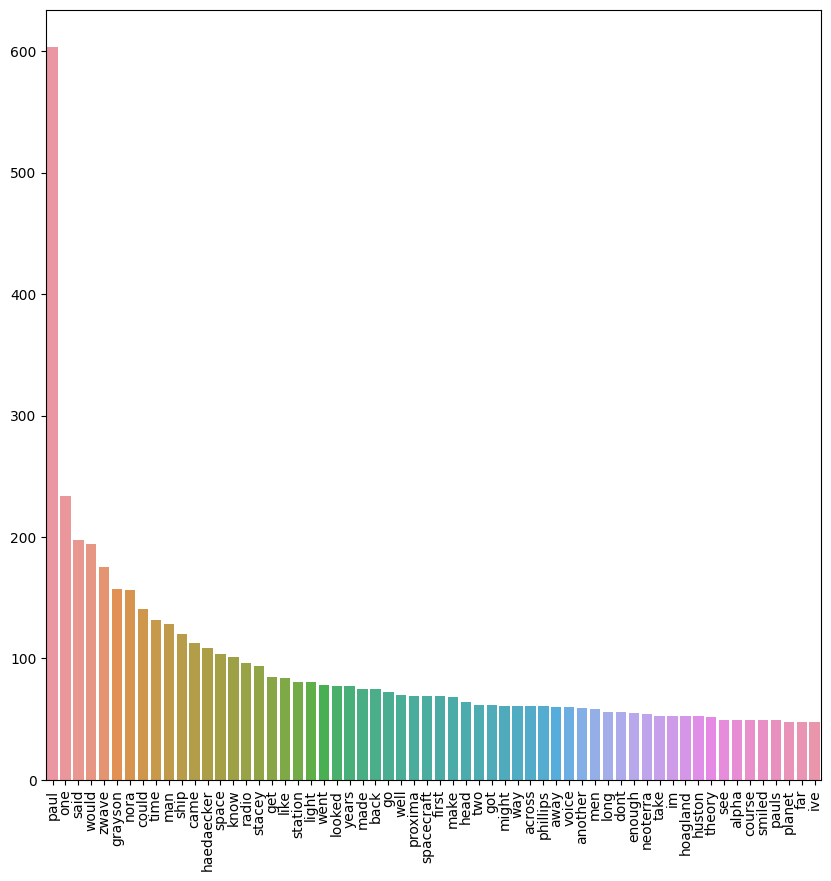

In [94]:
freq_graph(cleaned_text)

## Creating the WordCloud

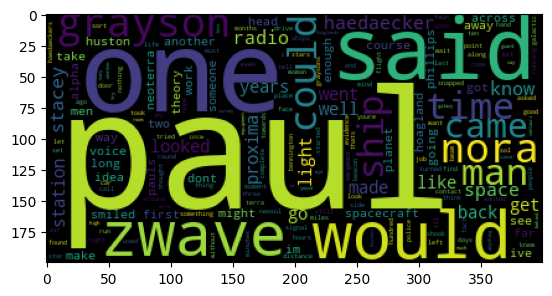

<Figure size 2000x3500 with 0 Axes>

In [95]:
cloud=WordCloud()
wordCloud=cloud.generate_from_frequencies(mapped_freq)
plt.imshow(wordCloud)
plt.figure(figsize=(20,35))
plt.show()

## Pos Tagging the cleaned text

In [96]:
posTagged=nltk.pos_tag(cleaned_text)

In [97]:
posTagged

[('operation', 'NN'),
 ('interstellar', 'NN'),
 ('produced', 'VBD'),
 ('greg', 'JJ'),
 ('weeks', 'NNS'),
 ('mary', 'JJ'),
 ('meehan', 'NNS'),
 ('online', 'VBP'),
 ('distributed', 'VBN'),
 ('proofreading', 'VBG'),
 ('team', 'NN'),
 ('httpwwwpgdpnet', 'NN'),
 ('operation', 'NN'),
 ('interstellar', 'JJ'),
 ('_by_', 'NNP'),
 ('george', 'NN'),
 ('smith', 'JJ'),
 ('century', 'NN'),
 ('publications', 'NNS'),
 ('chicago', 'VBP'),
 ('published', 'JJ'),
 ('century', 'NN'),
 ('publications', 'NNS'),
 ('clark', 'VBP'),
 ('st', 'JJ'),
 ('chicago', 'NN'),
 ('ill', 'NN'),
 ('_printed', 'VBD'),
 ('united', 'JJ'),
 ('states', 'NNS'),
 ('america_', 'VBP'),
 ('characters', 'NNS'),
 ('situations', 'NNS'),
 ('book', 'NN'),
 ('fictional', 'JJ'),
 ('similarity', 'NN'),
 ('actual', 'JJ'),
 ('persons', 'NNS'),
 ('places', 'NNS'),
 ('purely', 'RB'),
 ('coincidental', 'JJ'),
 ('permission', 'NN'),
 ('use', 'NN'),
 ('refrains', 'VBZ'),
 ('ballad', 'JJ'),
 ('cyclotronists', 'NNS'),
 ('nightmare', 'VBP'),
 ('arthur

## Visualising the POS TAGS

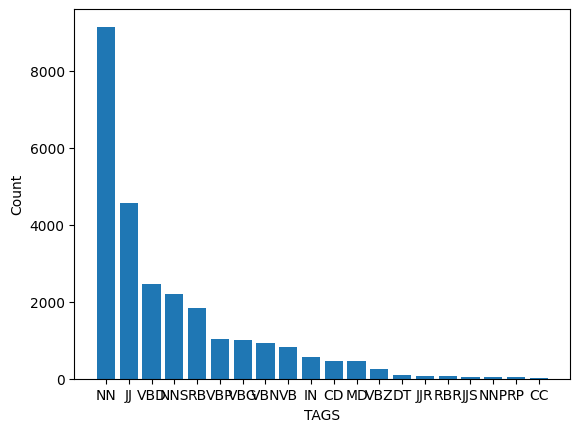

In [98]:
dict1 = {}
for key, value in posTagged:
    if(value not in dict1):
        dict1[value] = 1
    else:
        dict1[value] += 1

sorted_tags = dict(sorted(dict1.items(), key=lambda item:item[1], reverse=True))


N = 20
sorted_tags=dict(list(sorted_tags.items())[0:N])

plt.bar(sorted_tags.keys(), sorted_tags.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

### Writing a function to find out the largest chapter and seperate all chapters

In [99]:

def chapter_seperate(raw_text):
    
    #splitting the chapters from the raw text
    chapters = re.split(r'CHAPTER \d+', raw_text)
    
    
    #creating an array for chapter lengths
    chapter_lengths=[len(i) for i in chapters]
    
    #taking out the largest chapter text
    largest_chapter=chapters[pd.Series(chapter_lengths).idxmax()]
    return largest_chapter,chapters


In [100]:
largest_chapter,chapters=chapter_seperate(raw_text)
largest_chapter

'\n\n\nLike most human beings, Paul could comprehend the actions of someone\nof his own type. But he could not understand the mental machinations\nof people who had other motives and other interests in life. Nor could\nhe seem to make other people understand that his continued interest in\nthe Z-wave was only just and sensible. After all, he had never had an\nopportunity to try it.\n\nTo Paul it was just that simple. Just let him try it. He had so much\nfaith in it that he could not foresee his next reaction if failure\ncame. Paul did not consider failure as a possibility, but if he did\nfail, he would automatically begin insisting upon a chance to continue,\ninsisting that something had gone awry, or that there were factors that\nmust be studied.\n\nThis sort of attitude was acceptable to Paul, yet he could not\ncomprehend the contemplated action of the political factions he was\ninvolved with.\n\nFor instance, one faction was going to falsify evidence in order to\nswing an election. 

### Processing the largest chapter text

In [101]:
largest_chapter_text=text_preprocessing(largest_chapter)
print(largest_chapter_text)

like most human beings paul could comprehend the actions of someone of his own type but he could not understand the mental machinations of people who had other motives and other interests in life nor could he seem to make other people understand that his continued interest in the zwave was only just and sensible after all he had never had an opportunity to try it to paul it was just that simple just let him try it he had so much faith in it that he could not foresee his next reaction if failure came paul did not consider failure as a possibility but if he did fail he would automatically begin insisting upon a chance to continue insisting that something had gone awry or that there were factors that must be studied this sort of attitude was acceptable to paul yet he could not comprehend the contemplated action of the political factions he was involved with for instance one faction was going to falsify evidence in order to swing an election this seemed dishonest to paul he wondered just h

## Writing a function to calculate the bigram probabilities from a given text

In [102]:
def bigram_probability(text):
    
    words = text.split()
    # Counting the occurrences of bigrams
    bigrams=list(ngrams(words,2,pad_right=True))
    bigram_counts = Counter(bigrams)
    bigram_set=set(bigrams)

    # Calculating the probabilities
    
    #total number of unique bigrams
    total_bigrams = len(bigram_counts)
    bigram_probabilities = {bigram: count / total_bigrams for bigram, count in bigram_counts.items()}
    bigram_probabilities = dict(sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True))
    
    return bigram_probabilities,bigram_set


def print_bigram_probabilities(bigram_probabilities):
    for bigram, probability in sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True):
        print(f"Bigram: {bigram}, Probability: {probability:.6f}")
        


## Calculating the bigram probabilities of the largest chapter 

In [103]:
bigram_probabilities,bigram_set=bigram_probability(largest_chapter_text)
print_bigram_probabilities(bigram_probabilities)

Bigram: ('of', 'the'), Probability: 0.010303
Bigram: ('it', 'was'), Probability: 0.004371
Bigram: ('on', 'the'), Probability: 0.004059
Bigram: ('and', 'the'), Probability: 0.003746
Bigram: ('as', 'the'), Probability: 0.003434
Bigram: ('with', 'the'), Probability: 0.003122
Bigram: ('would', 'be'), Probability: 0.003122
Bigram: ('in', 'the'), Probability: 0.002810
Bigram: ('the', 'other'), Probability: 0.002810
Bigram: ('at', 'the'), Probability: 0.002810
Bigram: ('was', 'a'), Probability: 0.002810
Bigram: ('the', 'zwave'), Probability: 0.002498
Bigram: ('had', 'been'), Probability: 0.002498
Bigram: ('and', 'then'), Probability: 0.002498
Bigram: ('from', 'the'), Probability: 0.002498
Bigram: ('to', 'the'), Probability: 0.002498
Bigram: ('the', 'door'), Probability: 0.002498
Bigram: ('he', 'could'), Probability: 0.002185
Bigram: ('he', 'had'), Probability: 0.002185
Bigram: ('did', 'not'), Probability: 0.002185
Bigram: ('stacey', 'and'), Probability: 0.002185
Bigram: ('across', 'the'), Pro

### Taking out some other random chapter 

In [104]:
random_chapter=rnd.choice(chapters)
random_chapter

'\n\n\n"I\'m pointing for Alpha Centauri," said Paul. "And so that\'s what we\ncalculate for."\n\nNora looked at the bays of neat equipment and shook her head. "Why not\naim at it and run?" she asked. "Surely you do not need this billion\ndollars\' worth of stuff to point out your destination."\n\n"We do," objected Paul. "You see, if I took off with my telescope\npointed along the axis of drive with the cross-hairs pointing at Alpha\nCentauri, I\'d be heading for the star where it was four years ago. I\nintend to be on the way for nine days. So I\'ll want to point the nose\nof the ship at the spot where Alpha will be nine days in the future\ninstead of four years in the past. Since Sol and Alpha drift in space,\nthe motion and velocities of both systems must be taken into account,\na correction-angle found, and then used to aim my ship. My telescope\nwill angle away from the ship\'s axis by that correction-angle. Add\nto that the fact that I am taking off from earth, which will give me

### Preprocessing the random chapter text

In [105]:
random_chapter=text_preprocessing(random_chapter)
random_chapter

'im pointing for alpha centauri said paul and so thats what we calculate for nora looked at the bays of neat equipment and shook her head why not aim at it and run she asked surely you do not need this billion dollars worth of stuff to point out your destination we do objected paul you see if i took off with my telescope pointed along the axis of drive with the crosshairs pointing at alpha centauri id be heading for the star where it was four years ago i intend to be on the way for nine days so ill want to point the nose of the ship at the spot where alpha will be nine days in the future instead of four years in the past since sol and alpha drift in space the motion and velocities of both systems must be taken into account a correctionangle found and then used to aim my ship my telescope will angle away from the ships axis by that correctionangle add to that the fact that i am taking off from earth which will give me some angular velocity and some rotational velocity differing from an 

### Tokenizing the random chapter text

In [106]:
tokenized_chapter=word_tokenize(random_chapter)
tokenized_chapter

['im',
 'pointing',
 'for',
 'alpha',
 'centauri',
 'said',
 'paul',
 'and',
 'so',
 'thats',
 'what',
 'we',
 'calculate',
 'for',
 'nora',
 'looked',
 'at',
 'the',
 'bays',
 'of',
 'neat',
 'equipment',
 'and',
 'shook',
 'her',
 'head',
 'why',
 'not',
 'aim',
 'at',
 'it',
 'and',
 'run',
 'she',
 'asked',
 'surely',
 'you',
 'do',
 'not',
 'need',
 'this',
 'billion',
 'dollars',
 'worth',
 'of',
 'stuff',
 'to',
 'point',
 'out',
 'your',
 'destination',
 'we',
 'do',
 'objected',
 'paul',
 'you',
 'see',
 'if',
 'i',
 'took',
 'off',
 'with',
 'my',
 'telescope',
 'pointed',
 'along',
 'the',
 'axis',
 'of',
 'drive',
 'with',
 'the',
 'crosshairs',
 'pointing',
 'at',
 'alpha',
 'centauri',
 'id',
 'be',
 'heading',
 'for',
 'the',
 'star',
 'where',
 'it',
 'was',
 'four',
 'years',
 'ago',
 'i',
 'intend',
 'to',
 'be',
 'on',
 'the',
 'way',
 'for',
 'nine',
 'days',
 'so',
 'ill',
 'want',
 'to',
 'point',
 'the',
 'nose',
 'of',
 'the',
 'ship',
 'at',
 'the',
 'spot',
 '

### Writing a function to generate a random sentence from the chapter

In [145]:
def generate_random_sentence(tokens):
    
    #generating a random sentence of 8 to 10 words
    phrase_length = rnd.randint(8, 10)
    start_index = rnd.randint(0, len(tokenized_chapter) - phrase_length)
    random_sentence_words_list=tokenized_chapter[start_index:start_index+phrase_length]
    
    random_word_index=rnd.randint(1,len(random_sentence_words_list)-1)
    original_word=random_sentence_words_list[random_word_index]
    random_sentence_words_list[random_word_index]="______"
    consecutive_phrase = " ".join(random_sentence_words_list)
    
    #returning list of words in the random sentence , original word , and index of word before original word
    return random_sentence_words_list,original_word,random_word_index-1

## Writing the Shannon Game function 

In [137]:
def play_shannon_game(tokens,bigram_set):
    sentence,original,index=generate_random_sentence(tokenized_chapter)
    print("Random Sentence from the chapter-:")
    consecutive_phrase = " ".join(sentence)
    print(consecutive_phrase,"\n")
    
    selected_pairs = [pair for pair in bigram_set if pair[0] == sentence[index]]
    try:
        highest_value_pair = max(selected_pairs, key=lambda pair: bigram_probabilities.get(pair, 0))
        print(f"Most probable word according to bigram probability: {highest_value_pair[1]}")
        print("Original word: ",original)  
        print(".............................................\n\n")
        if highest_value_pair[1]==original:
            return True
        else:
            return False
        
    except ValueError as e:
        print(f"Bigram starting with ",{sentence[index]}," wasn't found in the training text.")
        print(".............................................\n\n")
        return False
      

In [138]:
play_shannon_game(tokenized_chapter,bigram_set)

Random Sentence from the chapter-:
they looked ______ be to the eye there would 

Most probable word according to bigram probability: reasonably
Original word:  to
.............................................




False

## Writing a function to get the frequency of correctly and incorrectly identified words by the Shannon game guess

In [156]:
def freq_guess_performance(n):
    incorrect=0
    correct=0
    for i in range(500):
        result=play_shannon_game(tokenized_chapter,bigram_set)
        if result==True:
            correct=correct+1
        else:
            incorrect=incorrect+1
    return correct,incorrect

In [157]:
correct,incorrect=freq_guess_performance(500)


Random Sentence from the chapter-:
or the ______ of a radio beacon on proxima 

Most probable word according to bigram probability: other
Original word:  ruin
.............................................


Random Sentence from the chapter-:
forget it you were doing your ______ but can 

Most probable word according to bigram probability: own
Original word:  duty
.............................................


Random Sentence from the chapter-:
said paul soberly he hung up turned ______ saw 

Most probable word according to bigram probability: away
Original word:  and
.............................................


Random Sentence from the chapter-:
i ______ why columbus had been kicked around for having 

Most probable word according to bigram probability: thought
Original word:  but
.............................................


Random Sentence from the chapter-:
that sounded ______ pure soap opera in space ive 

Bigram starting with  {'sounded'}  wasn't found in the training text.


## Writing a function and visualising the Shannon game guesses on a Pie Chart

In [158]:
def visualise_the_guesses(correct,incorrect):
    y=[correct,incorrect]
    total=correct+incorrect
    accuracy=(float(correct)/total)
    mylabels=[f"Correctly Identified {accuracy*100:.2f}%",f"Incorrectly Identified {(1-accuracy)*100:.2f}%"]
    myexplode=[0,0.2]
    mycolors = ["green", "red"]
    plt.pie(y,labels=mylabels,explode=myexplode,colors=mycolors)
    plt.show()


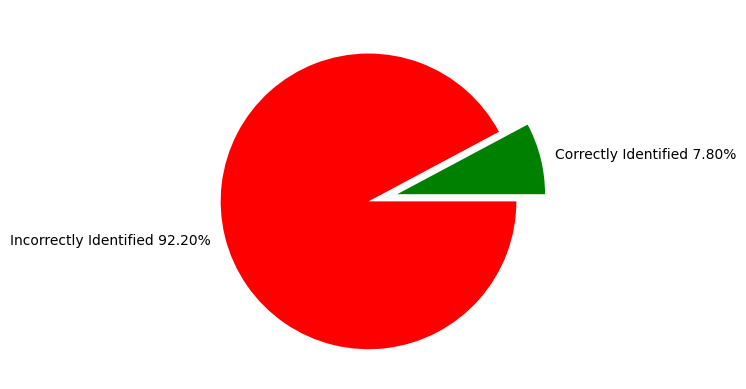

In [159]:
visualise_the_guesses(correct,incorrect)

The bigram probability constructed from the largest chapter of the book helped us to identify 5 to 9% of the words from a random sentence in a random chapter. If the training text were bigger better accuracy would have been expected.